# 파이썬에서의 다양한 시각화 방법

- matplotlib
- seaborn
- plotnine
- folium
- plot.ly
- pyecharts

## 1. Matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print("Matplotlib version", matplotlib.__version__)
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

### - 한글 폰트 지원

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# 운영체제에 따른 폰트 경로 설정
if platform.system() == "Darwin":  # Mac
    font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"  # Mac 기본 한글 폰트
elif platform.system() == "Windows":  # Windows
    font_path = "C:/Windows/Fonts/malgun.ttf"
else:
    font_path = None

# 폰트 설정
if font_path:
    font_name = fm.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_name)
else:
    print("지원되지 않는 OS이거나 폰트 파일이 없습니다.")

# 테스트 그래프 출력
plt.plot([1, 2, 3], [4, 3, 7])
plt.title("한글 폰트 테스트")
plt.show()


In [ ]:
import matplotlib.font_manager as fm

# 한글 폰트 지원
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rc('font', family=font_name) 

### - Figure 그리기

- Figure의 구성요소

<!-- ![plot의 구성요소](./resource/plot.png) -->
<img src='./resource/plot.png' width = "500px" height = "500px" alt="fig 구성"></img>

In [ ]:
fig = plt.figure()
fig.suptitle('figure sample plots')

fig, ax_lst = plt.subplots(2, 2, figsize=(8,5))

ax_lst[0][0].plot([1,2,3,4], 'ro-')
ax_lst[0][1].plot(np.random.randn(4, 10), np.random.randn(4,10), 'bo--')
ax_lst[1][0].plot(np.linspace(0.0, 5.0), np.cos(2 * np.pi * np.linspace(0.0, 5.0)))
ax_lst[1][1].plot([3,5], [3,5], 'bo:')
ax_lst[1][1].plot([3,7], [5,4], 'kx')
plt.show()

### - Pandas로 그리기

- pandas plot

In [16]:
df = pd.DataFrame(np.random.randn(4,4))

df

NameError: name 'pd' is not defined

- 가로 방향 바 그리기

In [ ]:
df.plot(kind='barh')

- 커널밀도추정 그래프 그리기 (kde)

In [ ]:
df.plot(kind='kde')

- 그룹별 누적하여 바 차트로 그리기

In [ ]:
df = pd.DataFrame({'years':['2018', '2018', '2019', '2019', '2020', '2021'], 'values': [2, 4, 3, 1, 4, 7]})

df

In [ ]:
grouped_data = df.groupby('years')
result = grouped_data['values'].sum()

In [ ]:
type(grouped_data)
print(grouped_data)
print(grouped_data['values'])
grouped_data.head()

In [ ]:
plt.figure(figsize=(6,4))
# plt.bar(df['years'], df['values'])
# plt.bar(grouped_df['years'], grouped_df['values'])
# plt.bar(grouped_data['years'],result)
result.plot(kind='bar',)
plt.title('years 대비 values', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### 2. Seaborn

In [ ]:
import seaborn as sns

print("Seaborn version : ", sns.__version__)
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

Seaborn version :  0.13.2


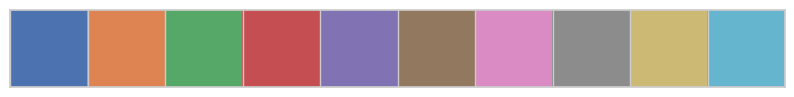

In [ ]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [ ]:
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


### - pie()

<Axes: title={'center': 'tips per various points'}, ylabel='count'>

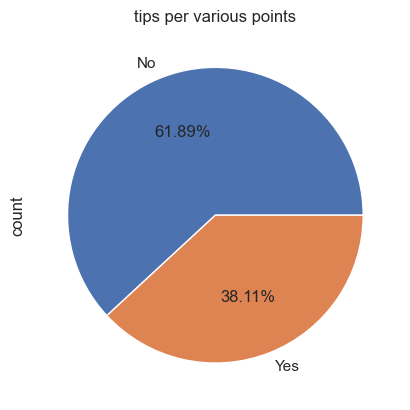

In [6]:
tips.smoker.value_counts().plot.pie(autopct='%0.2f%%', title='tips per various points')

### - kedplot()

<Axes: xlabel='total_bill', ylabel='Density'>

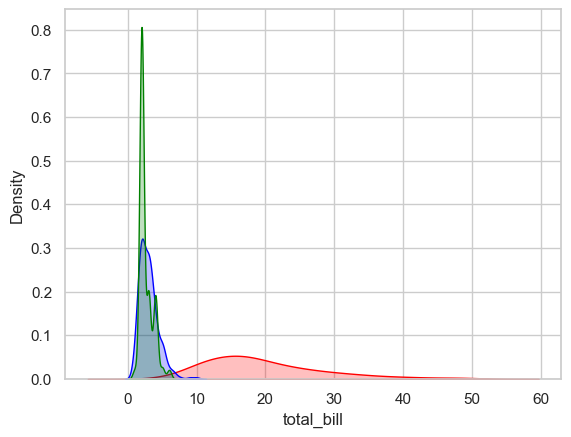

In [7]:
sns.kdeplot(x=tips.total_bill, color='red', fill = True)
sns.kdeplot(x=tips.tip, color='blue', fill = True)
sns.kdeplot(x=tips['size'], color='green', fill = True)


### - scatterplot()

<Axes: xlabel='total_bill', ylabel='tip'>

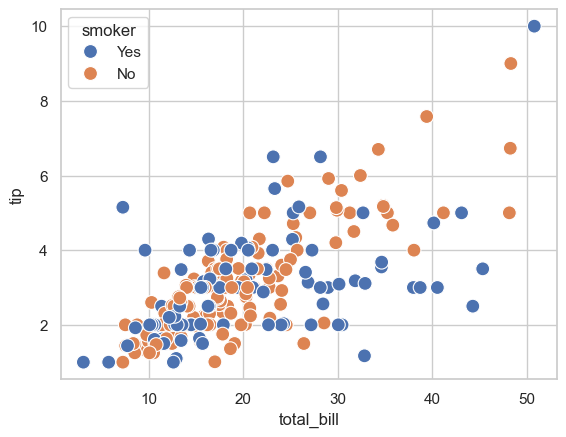

In [8]:
sns.scatterplot(x='total_bill', y='tip', hue='smoker', data=tips, s=100)

### - replot()

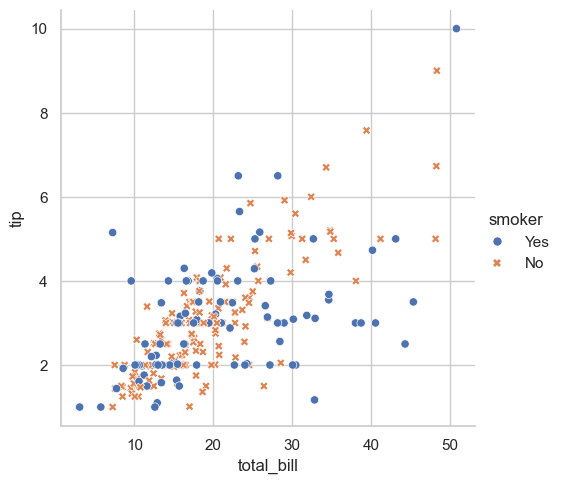

In [9]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips)

In [10]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
# g.fig.autofmt_xdate()

NameError: name 'pd' is not defined

### - Catplot()

In [ ]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=1.,
            kind="swarm", data=tips)

In [ ]:
sns.catplot(x="total_bill", y="day", hue="smoker",
            col="time", aspect=1.,
            kind="box", orient = "h", data=tips)

### - Pairplot()

In [ ]:
sns.pairplot(tips)

In [ ]:
sns.pairplot(tips, hue='smoker')

### - PairGrid

In [ ]:
g = sns.PairGrid(tips, hue='smoker')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)

### - heatmap()

In [ ]:
tips1 = tips.replace({'smoker':'Yes', 'sex': 'Male'}, 1)
tips1 = tips1.replace({'smoker':'No', 'sex': 'Female'}, 0)
tips1.head()

In [ ]:
tips1.info()

In [ ]:
tips1['smoker'] = tips1.smoker.astype('int')
tips1['sex'] = tips1.sex.astype('int')
tips1.info()

In [ ]:
tips1 = tips1[["total_bill", "tip", "size", "smoker", "sex"]].astype('float').corr()
plt.figure(figsize=(6, 6))
ax = sns.heatmap(tips1, annot=True)

## 3. Folium

- 지도 데이터 (Open Street Map)에 위치 정보를 시각화하는 라이브러리
- 한국 GeoJson 데이터는 southkorea-maps에서 확인 가능

In [ ]:
!pip install folium

In [ ]:
import folium

print("folium version is", folium.__version__)

In [ ]:
m = folium.Map(location=[37.6002, 127.032], zoom_start=11)
folium.Marker(location=[37.7095512, 127.046037], popup="신한대학교", icon=folium.Icon(color='blue',icon='home')).add_to(m)
folium.Marker(location=[37.5411, 127.0107], popup="한남동", icon=folium.Icon(color='red')).add_to(m)

m